sig_cz= 1316.84096117
v^2= 1319.25337011
n= 55
[  1.00000000e+03   1.10000000e+03   1.20000000e+03 ...,   4.99970000e+06
   4.99980000e+06   4.99990000e+06] [  1.16713138e-04   1.06102853e-04   9.72609485e-05 ...,   2.33440283e-08
   2.33435614e-08   2.33430945e-08] [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.75887572e-11
   1.75824517e-11   1.75761485e-11] [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   6.35381335e-12
   6.35140850e-12   6.34900457e-12]


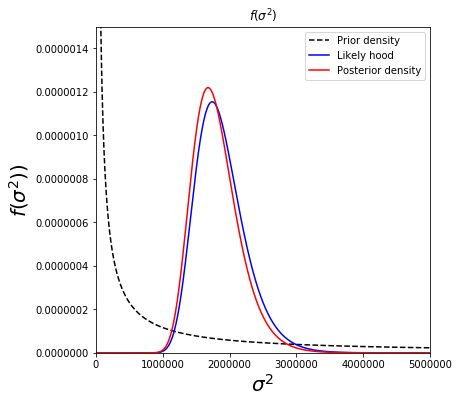

In [5]:
"""
Created on Mon Mar 19 10:43:01 2018

@author: Guo xiao
"""
import numpy as np
#import matplotlib as mpl
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import scipy.stats as stats
import scipy.special as special

def invgam(x,a,b):
    #fun=b**a/special.gamma(a)*x**(-(a+1))*np.exp(-b/x)
    lnfun=a*np.log(b)-np.log(special.gamma(a))-(a+1)*np.log(x)-b/x
    #print lnf    
    fun=np.exp(lnfun)
    return fun#fun
    
def invchi2(x,nu,tau2):
    #fun=(nu*tau2/2)**(nu/2)*np.exp(-nu*tau2/2/x)/special.gamma(nu/2)/x**(nu/2+1)
    lnfun=nu/2*np.log(nu*tau2/2)-nu*tau2/2/x-np.log(special.gamma(nu/2))-(nu/2+1)*np.log(x)
    fun=np.exp(lnfun)
    return fun#fun

hdulist=fits.open('ComaCluster.fits')
#hdulist.info()
hdulist[0].header
coma=hdulist[1].data
#rint hdulist[1].data.names
#hdulist[1].data.field()
cz = coma.czA[(coma.czA<20000) & (coma.czA>0)]
sig_cz = np.var(cz)
n=len(cz)
print "sig_cz=",np.sqrt(sig_cz)
mu=6925.#mean
v2=np.mean((cz-mu)**2)
print "v^2=",np.sqrt(v2)
#x=np.arange(1,100,0.1)
dsigma2=100.
maxsig=5e6
sigma2=np.arange(1e3,maxsig,dsigma2)
p00=1.0/sigma2#prior unnormalized
p0=p00/np.sum(p00)/dsigma2#prior (normalized)
py=invgam(sigma2,float(n)/2-1,float(n)*v2/2)#likely hood
p1=invgam(sigma2,float(n)/2,float(n)*v2/2)#posterior
print "n=",n
print sigma2,p0,py,p1

plt.figure(figsize=[6,6])
plt.title('$f(\sigma^2)$')
plt.plot(sigma2,p0,'k--',label='Prior density')
plt.xlabel(r'$\sigma^2$',fontsize=20)
plt.plot(sigma2,py,'b-',label='Likely hood')
plt.xlabel(r'$\sigma^2$',fontsize=20)
plt.plot(sigma2,p1,'r-',label='Posterior density')
plt.legend()
plt.xlabel(r'$\sigma^2$',fontsize=20)
plt.ylabel(r'$f(\sigma^2)$)',fontsize=20)
plt.xlim(0,maxsig)
plt.ylim(0,1.5e-6)
plt.show()

[  1.00000000e+03   1.10000000e+03   1.20000000e+03 ...,   4.99970000e+06
   4.99980000e+06   4.99990000e+06] [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   3.06658187e-09
   3.06627521e-09   3.06596859e-09] [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.75887572e-11
   1.75824517e-11   1.75761485e-11] [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   2.13697489e-13
   2.13599517e-13   2.13501591e-13]


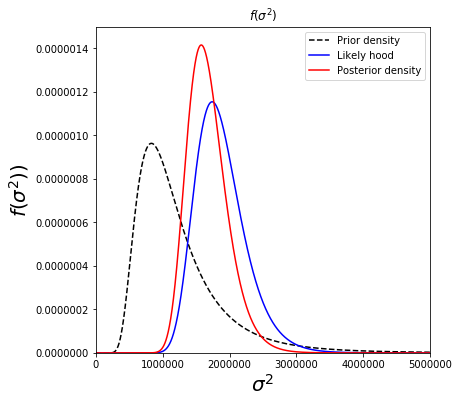

In [7]:
nu0=10.
sig02=1000.**2
p0=invchi2(sigma2,nu0,sig02)#prior 
py=invgam(sigma2,float(n)/2-1,float(n)*v2/2)#likely hood
p1=invchi2(sigma2,nu0+float(n),(nu0*sig02+float(n)*v2)/(nu0+float(n)))#posterior
print sigma2,p0,py,p1

plt.figure(figsize=[6,6])
plt.title('$f(\sigma^2)$')
plt.plot(sigma2,p0,'k--',label='Prior density')
plt.xlabel(r'$\sigma^2$',fontsize=20)
plt.plot(sigma2,py,'b-',label='Likely hood')
plt.xlabel(r'$\sigma^2$',fontsize=20)
plt.plot(sigma2,p1,'r-',label='Posterior density')
plt.legend()
plt.xlabel(r'$\sigma^2$',fontsize=20)
plt.ylabel(r'$f(\sigma^2)$)',fontsize=20)
plt.xlim(0,maxsig)
plt.ylim(0,1.5e-6)
plt.show()